In [2]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
import random


In [3]:
def seed_everything(seed):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True

seed_everything(1)

In [4]:
class Net(nn.Module):
    '''
    Tried changing initial channels 8 -> 9, to increase capacity by little

    '''
    def __init__(self):
        super(Net, self).__init__()

        # convolution block 1        
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(1, 9, 3,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(9),
#            nn.Dropout(0.05),

            nn.Conv2d(9, 9, 3,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(9),
#            nn.Dropout(0.05)
        )

        # convolution block 2
        self.conv_block_2 = nn.Sequential(

            nn.Conv2d(9, 9, 3,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(9),
 #           nn.Dropout(0.05)

            # nn.Conv2d(8, 8, 3),
            # nn.ReLU(),
            # nn.BatchNorm2d(8)
        )

        # transition block 1
        self.transition_1 = nn.Sequential(

            nn.MaxPool2d(2, 2)
        )
        
        # convolution block 3
        self.conv_block_3 = nn.Sequential(
            nn.Conv2d(9, 16, 3,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
#            nn.Dropout(0.05), 

            nn.Conv2d(16, 16, 3,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
#            nn.Dropout(0.05), 

            nn.Conv2d(16, 16, 3,bias=False),
            nn.ReLU(),
            nn.BatchNorm2d(16),
#            nn.Dropout(0.05), 

            nn.Conv2d(16, 10, 1,bias=False),
        
        )
        

        # op block
        self.gap = nn.Sequential(
            nn.AvgPool2d(kernel_size=5)
        ) 

        # fully connected
#        self.fc1 = nn.Linear(16,10)


    def forward(self, x):

        x = self.conv_block_1(x)
        x = self.conv_block_2(x)
        x = self.transition_1(x)
        x = self.conv_block_3(x)
 
        # GAP 
#        x = F.adaptive_avg_pool2d(x, (4, 4))  # Input - 7x7x32 -> Output - 1x1x32
        x = self.gap(x)


# #        reshape using flatten
#         x = torch.flatten(x, 1)

# #        Fully connected layer
#         x = self.fc1(x) # 1x1x32 -> 1x1x10


        x = x.view(-1, 10)

        return F.log_softmax(x,dim=-1)

In [5]:
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 9, 26, 26]              81
              ReLU-2            [-1, 9, 26, 26]               0
       BatchNorm2d-3            [-1, 9, 26, 26]              18
            Conv2d-4            [-1, 9, 24, 24]             729
              ReLU-5            [-1, 9, 24, 24]               0
       BatchNorm2d-6            [-1, 9, 24, 24]              18
            Conv2d-7            [-1, 9, 22, 22]             729
              ReLU-8            [-1, 9, 22, 22]               0
       BatchNorm2d-9            [-1, 9, 22, 22]              18
        MaxPool2d-10            [-1, 9, 11, 11]               0
           Conv2d-11             [-1, 16, 9, 9]           1,296
             ReLU-12             [-1, 16, 9, 9]               0
      BatchNorm2d-13             [-1, 16, 9, 9]              32
           Conv2d-14             [-1, 1

In [6]:
model

Net(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 9, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(9, 9, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (4): ReLU()
    (5): BatchNorm2d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(9, 9, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(9, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (transition_1): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_3): Sequential(
    (0): Conv2d(9, 16, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (1): ReLU()
    (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (4): ReLU(

```
    -----------------------------------------------------------------------------------------------------
        Layer (type)               Output Shape         Param #        Input        Output      RF
=====================================================================================================
            Conv2d-1            [-1, 9, 26, 26]              81        28x28        26x26       3x3
              ReLU-2            [-1, 9, 26, 26]               0
       BatchNorm2d-3            [-1, 9, 26, 26]              18
            Conv2d-4            [-1, 9, 24, 24]             729        26x26        24x24       5x5
              ReLU-5            [-1, 9, 24, 24]               0
       BatchNorm2d-6            [-1, 9, 24, 24]              18
            Conv2d-7            [-1, 9, 22, 22]             729        24x24        22x22       7x7
              ReLU-8            [-1, 9, 22, 22]               0
       BatchNorm2d-9            [-1, 9, 22, 22]              18
        MaxPool2d-10            [-1, 9, 11, 11]               0        22x22        11x11       7x7
           Conv2d-11             [-1, 16, 9, 9]           1,296        11x11         9x9       11x11
             ReLU-12             [-1, 16, 9, 9]               0
      BatchNorm2d-13             [-1, 16, 9, 9]              32
           Conv2d-14             [-1, 16, 7, 7]           2,304         9x9          7x7       15x15
             ReLU-15             [-1, 16, 7, 7]               0
      BatchNorm2d-16             [-1, 16, 7, 7]              32
           Conv2d-17             [-1, 16, 5, 5]           2,304         7x7          5x5       19x19
             ReLU-18             [-1, 16, 5, 5]               0
      BatchNorm2d-19             [-1, 16, 5, 5]              32
           Conv2d-20             [-1, 10, 5, 5]             160         5x5          5x5       19x19
        AvgPool2d-21             [-1, 10, 1, 1]               0         5x5          1x1       27x27
=====================================================================================================
```

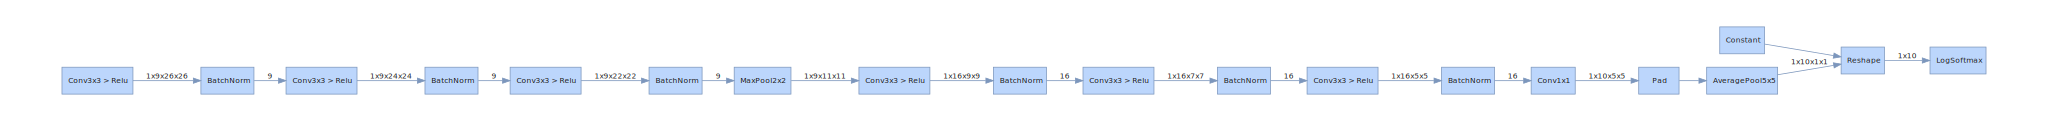

In [7]:
import hiddenlayer as hl

hl_graph=hl.build_graph(model, torch.zeros([1,1, 28, 28]).cuda())
hl_graph.theme = hl.graph.THEMES["blue"].copy()  # Two options: basic and blue
hl_graph

In [6]:
#torch.manual_seed(1)
batch_size = 128

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=True, download=False,
                    transform=transforms.Compose([
                        transforms.RandomAffine(degrees=10, translate=(0.1,0.1), scale=(0.9, 1.1)),
                        transforms.ColorJitter(brightness=0.10, contrast=0.1, saturation=0.10, hue=0.1),
#                        transforms.RandomCrop(28 , padding = 1),
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(
    datasets.MNIST('./data', train=False, transform=transforms.Compose([
                        transforms.ToTensor(),
                        transforms.Normalize((0.1307,), (0.3081,))
                    ])),
    batch_size=batch_size, shuffle=True, **kwargs)

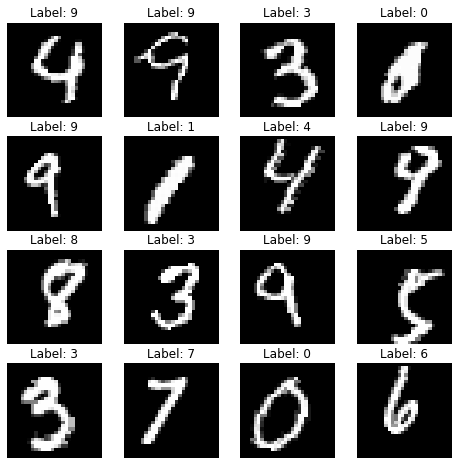

In [7]:
def show_batch(dl):
    images, labels = next(iter(dl))
    plt.figure(figsize=(8, 8))
    for i in range(16):
        ax = plt.subplot(4, 4, i + 1)
        ax.imshow(torch.squeeze(images[i], axis=0), cmap='gray')
        plt.title(f'Label: {labels[i].item()}')
        plt.axis('off')

show_batch(train_loader)

In [8]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
    correct = 0
    model.train()
    pbar = tqdm(train_loader)
    per_batch_loss = []

    for batch_idx, (data, target) in enumerate(pbar):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)

        pred = output.argmax(dim=1, keepdim=True)          
        correct += pred.eq(target.view_as(pred)).sum().item()

        loss = F.nll_loss(output, target)
        per_batch_loss.append(loss.item())
        loss.backward()
        optimizer.step()
#        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')

    
    per_epoch_loss = sum(per_batch_loss)/len(per_batch_loss)
    per_epoch_accuracy = 100.*( correct / len(train_loader.dataset))
    
    return per_epoch_loss, per_epoch_accuracy

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    # print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.2f}%)\n'.format(
    #     test_loss, correct, len(test_loader.dataset),
    #     100. * correct / len(test_loader.dataset)))


    return test_loss , 100. * correct / len(test_loader.dataset)


In [9]:
from torch.optim.lr_scheduler import StepLR

model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.015, momentum=0.9)
scheduler = StepLR(optimizer, step_size=6, gamma=0.1)




loss_train = []
accuracy_train = []
loss_test = []
accuracy_test = []
epochs = 15

for epoch in range(0, epochs):
    print('============== EPOCH ', epoch)
    loss_train_epoch,accuracy_train_epoch = train(model, device, train_loader, optimizer, epoch)
    loss_test_epoch, accuracy_test_epoch = test(model, device, test_loader)
    scheduler.step()
    
    loss_train.append(loss_train_epoch)
    accuracy_train.append(accuracy_train_epoch)

    loss_test.append(loss_test_epoch)
    accuracy_test.append(accuracy_test_epoch)

    print(f'\t Train accuracy : {accuracy_train_epoch} , Test Accuracy: {accuracy_test_epoch}')
    print(f'\t Train Loss: {loss_train_epoch} , Test Loss: {loss_test_epoch}')
    

def plot_loss(train_loss, test_loss):
    plt.figure(figsize=(8,6))
    plt.plot(np.linspace(1, epochs, epochs).astype(int),loss_train,'-x')
    plt.plot(np.linspace(1, epochs, epochs).astype(int),loss_test,'-x')
    plt.legend(['train_loss', 'test_loss'])
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.title('Loss vs. No. of epochs')


def plot_accuracy(train_acc, test_acc):
    plt.figure(figsize=(8,6))
    plt.plot(np.linspace(1, epochs, epochs).astype(int),train_acc,'-x')
    plt.plot(np.linspace(1, epochs, epochs).astype(int),test_acc,'-x')
    plt.legend(['train_acc', 'test_acc'])
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs')


  0%|          | 0/469 [00:00<?, ?it/s]	 Train accuracy : 88.61333333333333 , Test Accuracy: 98.18
	 Train Loss: 0.41383629409806816 , Test Loss: 0.06689922139644623
============== EPOCH  1
  0%|          | 0/469 [00:00<?, ?it/s]	 Train accuracy : 96.87166666666667 , Test Accuracy: 98.43
	 Train Loss: 0.10720437084799254 , Test Loss: 0.053271932864189145
============== EPOCH  2
  0%|          | 0/469 [00:00<?, ?it/s]	 Train accuracy : 97.62166666666666 , Test Accuracy: 99.12
	 Train Loss: 0.08032670029317901 , Test Loss: 0.02898362009525299
============== EPOCH  3
  0%|          | 0/469 [00:00<?, ?it/s]	 Train accuracy : 97.89999999999999 , Test Accuracy: 99.0
	 Train Loss: 0.07017088781939006 , Test Loss: 0.028190976548194885
============== EPOCH  4
  0%|          | 0/469 [00:00<?, ?it/s]	 Train accuracy : 98.13333333333333 , Test Accuracy: 99.23
	 Train Loss: 0.06184998878252023 , Test Loss: 0.025577700924873353
============== EPOCH  5
  0%|          | 0/469 [00:00<?, ?it/s]	 Train a

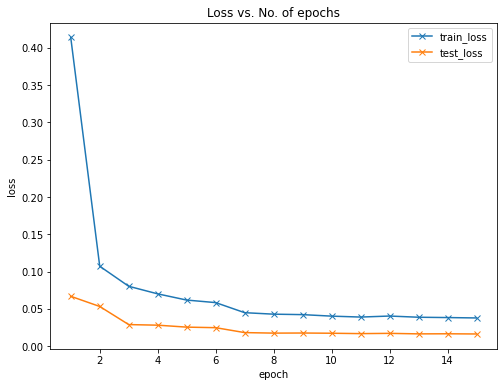

In [10]:
plot_loss(loss_train,loss_test)

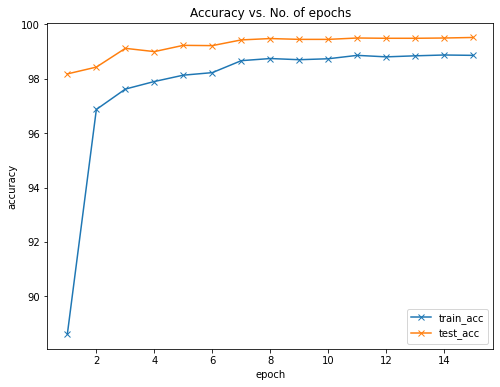

In [11]:
plot_accuracy(accuracy_train,accuracy_test)

Target:  
    
    Aim improve upon the little wiggle room from the last model where got consisent >99.4 in last epochs, by trying to increase the parameters.
    

Info:

    Just changed the channels in first 2 convolution blocks from 8 to 9. This way we are still under 8k params

Result:  
        Parameters: 7,753  
        Best Training Accuracy: 98.86 
        Best Test Accuracy: 99.52    

Analysis:  
  
        Best model so far, that consistently gave >99.4% for last **9 epochs**
        
        **Final Test Accuracy: 99.52**

        But we didn't want to consider this as the best model because:

            1. The parameters used are almmost 600 higher than previous, where we still got consistent >99.4
            2. I'ts Saturday, shubh din, we didn't want to take unlucky number like 9


In [ ]:
import hiddenlayer as hl

In [1]:
model

NameError: name 'model' is not defined